In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Central Limit Theorem ##

In [2]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


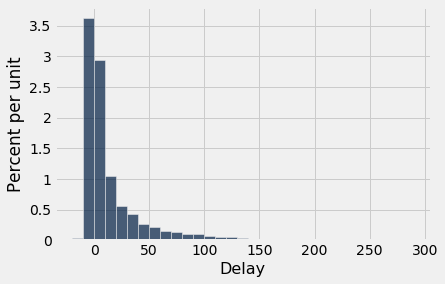

In [3]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [4]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

print("Delay mean:", mean_delay)
print("Delay SD:", sd_delay)

Delay mean: 16.658155515370705
Delay SD: 39.480199851609314


In [5]:
# One random sample mean
def one_sample_mean(sample_size):
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [6]:
one_sample_mean(900)

16.877777777777776

In [7]:
# Array of 10,000 sample means

def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, one_sample_mean(sample_size))
    return means

In [8]:
means_400 = ten_thousand_sample_means(400)

In [9]:
means_400

array([18.41  , 14.2275, 17.4675, ..., 17.8075, 18.885 , 18.92  ])

In [10]:
len(means_400)

10000

Population Average:  16.658155515370705


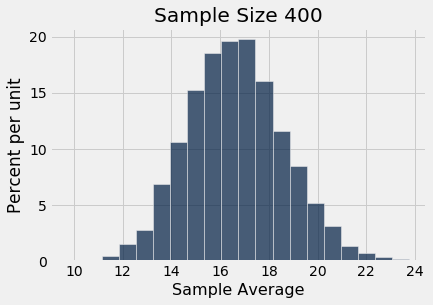

In [11]:
Table().with_column('Sample Mean', means_400).hist(bins = 20)

plots.title('Sample Size 400')
plots.xlabel('Sample Average')
print('Population Average: ', mean_delay);

In [12]:
np.average(means_400)

16.64452325

## Variability of the Sample Average ##

In [13]:
means_900 = ten_thousand_sample_means(900)

In [14]:
means_tbl = Table().with_columns(
    '400', means_400,
    '900', means_900
)

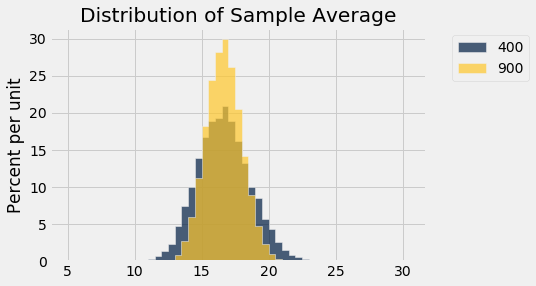

In [15]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

In [16]:
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

In [17]:
"""Empirical distribution of random sample means"""

def plot_sample_means(sample_size):
    means = ten_thousand_sample_means(sample_size)
    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.65394
Population SD: 39.480199851609314
SD of sample means: 3.898635004254694


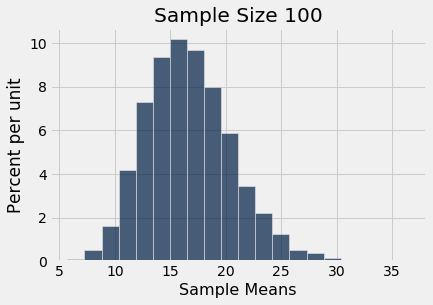

In [18]:
plot_sample_means(100)

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.68196325
Population SD: 39.480199851609314
SD of sample means: 1.9809322622251468


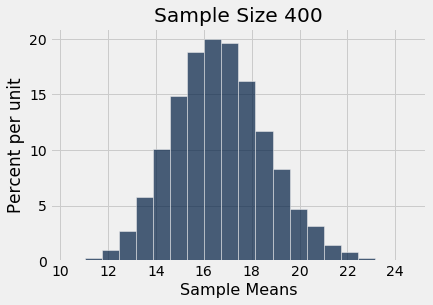

In [19]:
plot_sample_means(400)

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.664141120000004
Population SD: 39.480199851609314
SD of sample means: 1.5843482922303245


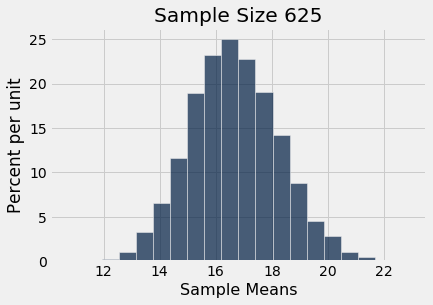

In [20]:
plot_sample_means(625)

In [21]:
sd_delay / (625 ** 0.5)

1.5792079940643726

In [22]:
# Cell takes about 30 seconds to run
sample_sizes = np.arange(50, 401, 50)
sd_of_sample_means = make_array()
for n in sample_sizes:
    means = ten_thousand_sample_means(n)
    sd_of_sample_means = np.append(sd_of_sample_means, np.std(means))

In [23]:
sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes, 
    'SD of 10,000 Sample Means', sd_of_sample_means, 
    'Population_SD/sqrt(n)', sd_delay/np.sqrt(sample_sizes))

In [24]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",Population_SD/sqrt(n)
50,5.65337,5.58334
100,3.93694,3.94802
150,3.27774,3.22354
200,2.80558,2.79167
250,2.47938,2.49695
300,2.26085,2.27939
350,2.11624,2.11031
400,1.98108,1.97401


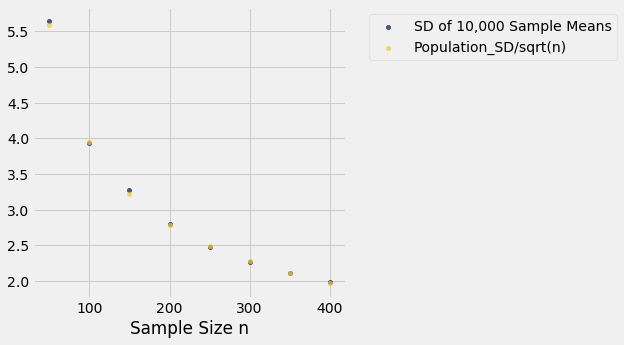

In [25]:
sd_comparison.scatter('Sample Size n')